$$\Large{\text{Adaptive Neuro Fuzzy Inference System}}$$

**Foi utilizado o Pacote "ANFIS" do R**

**Passos**
* Criar as funções de Pertinência Fuzzy

* Definir o conjunto de regras ( Tipo 3-Takagi-Sugeno )

*  Construir todas as combinações de Regras - Por exemplo, duas entradas e duas funções de pertinências geram 4 regras fuzzy

* Aplicar o método de aprendizagem Híbrido 

* Gerar os múltiplos outputs


-----------------------------------------------------------
* Layer 1: The fuzzification process which transforms crisp values into linguistic terms using the Gaussian function as the shape of the membership function.
* Layer 2: The inference stage using the t-norm operator (the AND operator).
* Layer 3: Calculating the ratio of the strengths of the rules.
* Layer 4: Calculating the consequent parameters.
* Layer 5: Calculating the overall output as the sum of all incoming signals.

## Exemplo 
[Link para o CRAN R-PROJECT](https://cran.r-project.org/web/packages/anfis/index.html)

In [2]:
#instalar o pacote 
install.packages('anfis')


The downloaded binary packages are in
	/var/folders/qq/gkyyxk3d0q769zkwc0hf1mfw0000gn/T//Rtmp36YBms/downloaded_packages


In [3]:
#carregar o pacote
library(anfis)

Loading required package: parallel


In [4]:
detectCores()


[1] 4

In [5]:
#Como geralmente há muitas operações ele sempre set a possibilidade de usar multiplos CORES 
##Set 4 cores using global options for multicore
options(cores=4)

In [4]:
##Example domain for bidimentional sinc(x,y) function
x <- seq(-10, 10, length= 11)

In [5]:
x

[1] -10  -8  -6  -4  -2   0   2   4   6   8  10

In [6]:
#funcao nativa trainSet
trainingSet <- trainSet(x,x)

In [7]:
#sumário da função.
trainSet

function (x, y) 
{
    sinc <- function(z) {
        ifelse(z == 0, 1, sin(z)/z)
    }
    out <- matrix(ncol = 3, nrow = 0)
    colnames(out) <- c("x", "y", "z")
    invisible(sapply(x, function(X) {
        sapply(y, function(Y) {
            out <<- rbind(out, c(X, Y, sinc(X) * sinc(Y)))
            return(NULL)
        })
    }))
    return(out)
}
<environment: namespace:anfis>

In [8]:
head(trainingSet,10)

x,y,z
-10,-10,0.002959590
-10,-8,-0.006727897
-10,-6,0.002533465
-10,-4,0.010292913
-10,-2,-0.024733850
-10,0,-0.054402111
-10,2,-0.024733850
-10,4,0.010292913
-10,6,0.002533465
-10,8,-0.006727897


In [9]:
Z <- matrix(trainingSet[,"z"],ncol=length(x),nrow=length(x))

In [10]:
#matriz simétrica para o mapeamento dos resultados
Z

0.002959590,-0.006727897,0.002533465,0.010292913,-0.02473385,-0.05440211,-0.02473385,0.010292913,0.002533465,-0.006727897,0.002959590
-0.006727897,0.015294215,-0.005759209,-0.023398400,0.05622631,0.12366978,0.05622631,-0.023398400,-0.005759209,0.015294215,-0.006727897
0.002533465,-0.005759209,0.002168695,0.008810931,-0.02117265,-0.04656925,-0.02117265,0.008810931,0.002168695,-0.005759209,0.002533465
0.010292913,-0.023398400,0.008810931,0.035796876,-0.08601982,-0.18920062,-0.08601982,0.035796876,0.008810931,-0.023398400,0.010292913
-0.024733850,0.056226307,-0.021172649,-0.086019820,0.20670545,0.45464871,0.20670545,-0.086019820,-0.021172649,0.056226307,-0.024733850
-0.054402111,0.123669781,-0.046569250,-0.189200624,0.45464871,1.00000000,0.45464871,-0.189200624,-0.046569250,0.123669781,-0.054402111
-0.024733850,0.056226307,-0.021172649,-0.086019820,0.20670545,0.45464871,0.20670545,-0.086019820,-0.021172649,0.056226307,-0.024733850
0.010292913,-0.023398400,0.008810931,0.035796876,-0.08601982,-0.18920062,-0.08601982,0.035796876,0.008810931,-0.023398400,0.010292913
0.002533465,-0.005759209,0.002168695,0.008810931,-0.02117265,-0.04656925,-0.02117265,0.008810931,0.002168695,-0.005759209,0.002533465
-0.006727897,0.015294215,-0.005759209,-0.023398400,0.05622631,0.12366978,0.05622631,-0.023398400,-0.005759209,0.015294215,-0.006727897
0.002959590,-0.006727897,0.002533465,0.010292913,-0.02473385,-0.05440211,-0.02473385,0.010292913,0.002533465,-0.006727897,0.002959590


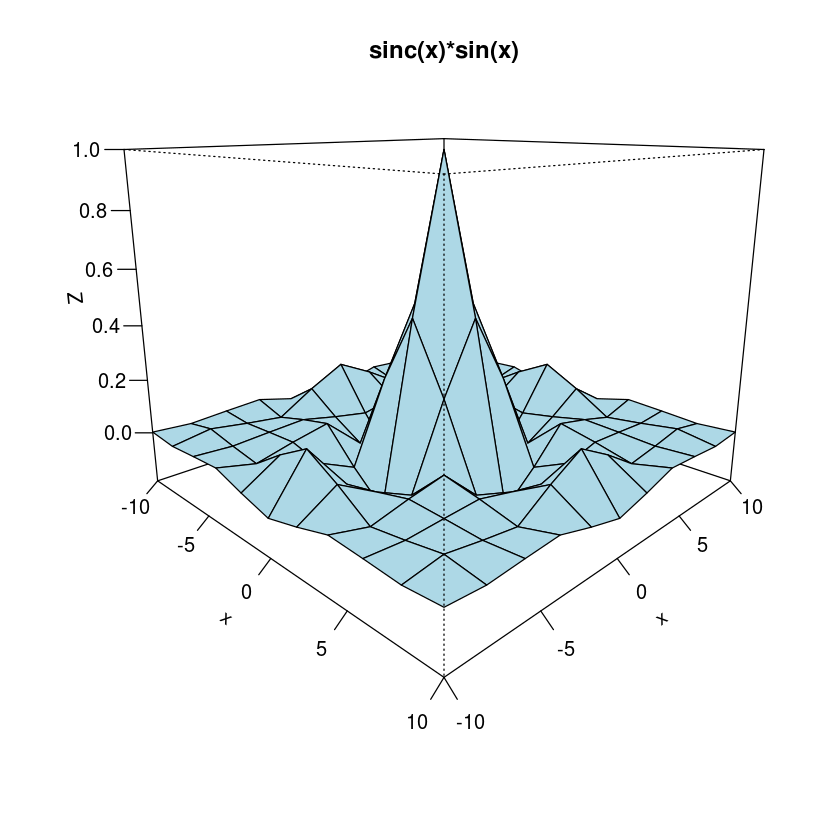

In [11]:
persp(x,x,Z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",ticktype="detailed",main="sinc(x)*sin(x)")

In [12]:
## Not run:persp(x,x,Z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",ticktype="detailed",main="sinc(x)*sin 
#
##Training domain patterns
X <- trainingSet[,1:2]

In [13]:
head(X,10)

x,y
-10,-10
-10,-8
-10,-6
-10,-4
-10,-2
-10,0
-10,2
-10,4
-10,6
-10,8


In [14]:
#drop = FALSE é para que os dados nao sejam transformados em um vetor
Y <- trainingSet[,3,drop=FALSE]

In [15]:
head(Y,10)

z
0.002959590
-0.006727897
0.002533465
0.010292913
-0.024733850
-0.054402111
-0.024733850
0.010292913
0.002533465
-0.006727897


In [16]:
#
##Defining the required MembershipFunctions for the ANFIS
membershipFunction <- list(x=c(new(Class="NormalizedGaussianMF",parameters=c(mu=-10,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=-5,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=0,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=5,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=10,sigma=2))),
y=c(new(Class="NormalizedGaussianMF",parameters=c(mu=-10,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=-5,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=0,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=5,sigma=2)),
new(Class="NormalizedGaussianMF",parameters=c(mu=10,sigma=2))))

In [17]:
membershipFunction

$x
$x[[1]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
  -10     2 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

$x[[2]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
   -5     2 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

$x[[3]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    0     2 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

$x[[4]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    5     2 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

$x[[5]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
   10     2 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))


$y
$y[[1]]
MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 


ELE CRIA DUAS ENTRADAS X E Y.....DEPOIS CRIAS AS 5 REPRESENTAÇÕES FUZZY PARA CADA UMA DAS ESTRADAS.OU SEJA, CADA ENTRADA É AVALIADA SOBRE 5 ASPECTOS FUZZY....PASSADO  O PRIMEIRO NÍVEL DA REDE NEURAL É NOVAMENTE AVALIADA SOBRE OS 5 CONJUNTOS FUZZY NOVAMENTE

In [18]:
#
##Creating the ANFIS network with 2 inputs and 4 MembershipFunctions in each input
anfis3 <- new(Class="ANFIS",X,Y,membershipFunction)
anfis3

ANFIS network 
Trainning Set: 
	 dim(x)= 121x2 
	 dim(y)= 121x1 
Arquitecture:  2 ( 5x5 ) - 25 - 75 ( 75x1 ) - 1 
Network not trained yet 

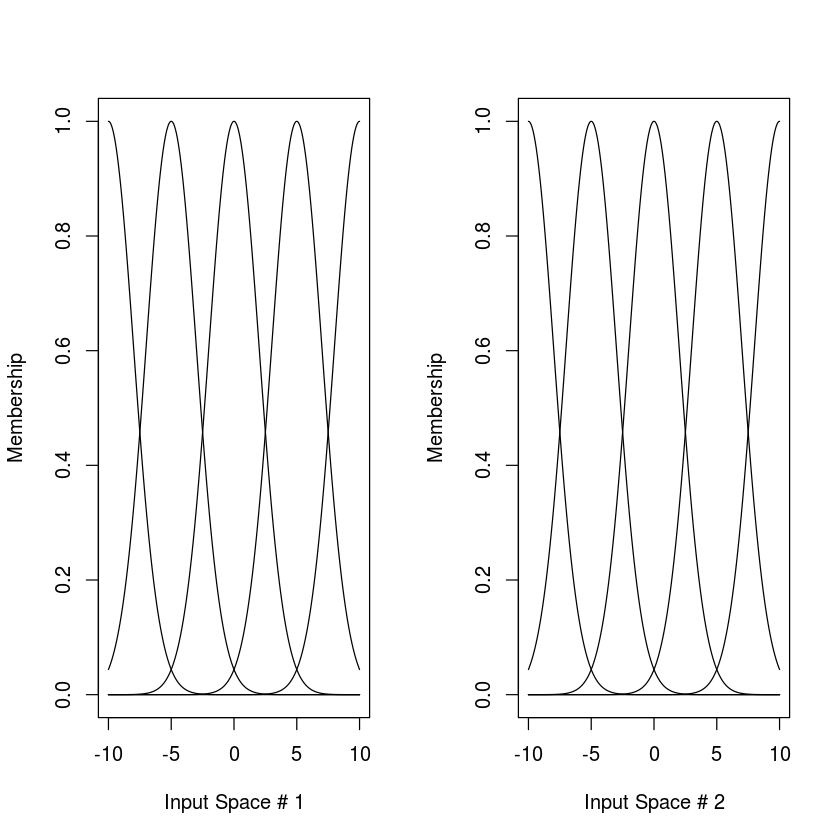

In [19]:
##Check for epsilon-completeness in each input
## Not run: plotMFs(anfis3)
plotMFs(anfis3)

In [20]:
#
##Check for epsilon-completeness in each input
##
#
##Training the ANFIS network
trainOutput <- trainHybridJangOffLine(anfis3, epochs=10)

[1] "epoch:  1"
[1] "epoch:  2"
[1] "epoch:  3"
[1] "epoch:  4"
[1] "epoch:  5"
[1] "epoch:  6"
[1] "epoch:  7"
[1] "epoch:  8"
[1] "epoch:  9"


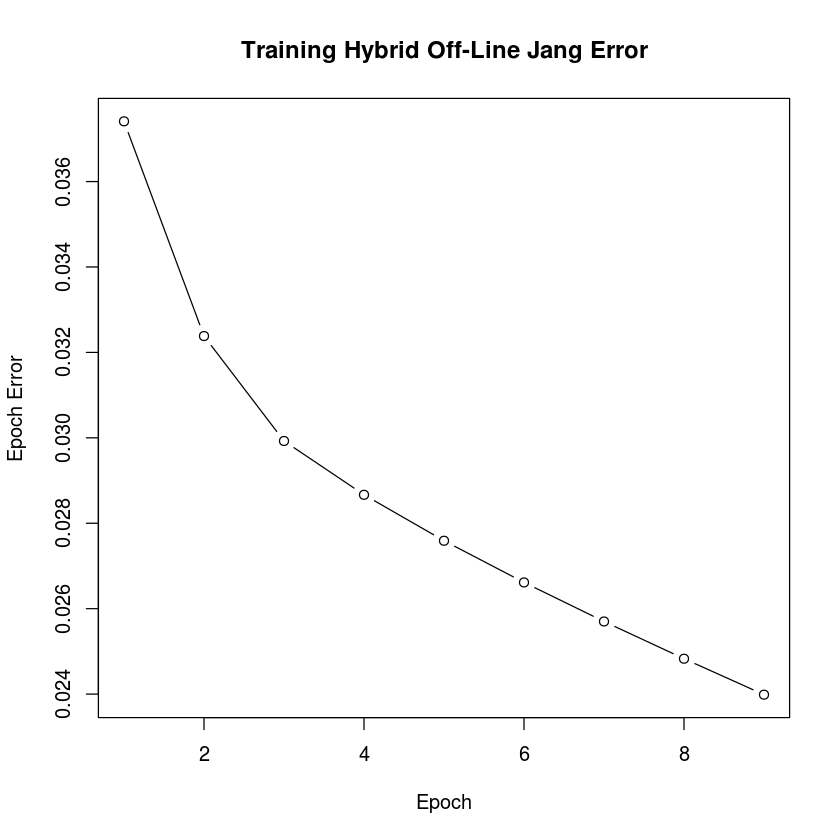

In [21]:
##How the training went
## Mostra o erro 
# Convergência do método
plot(anfis3)
#

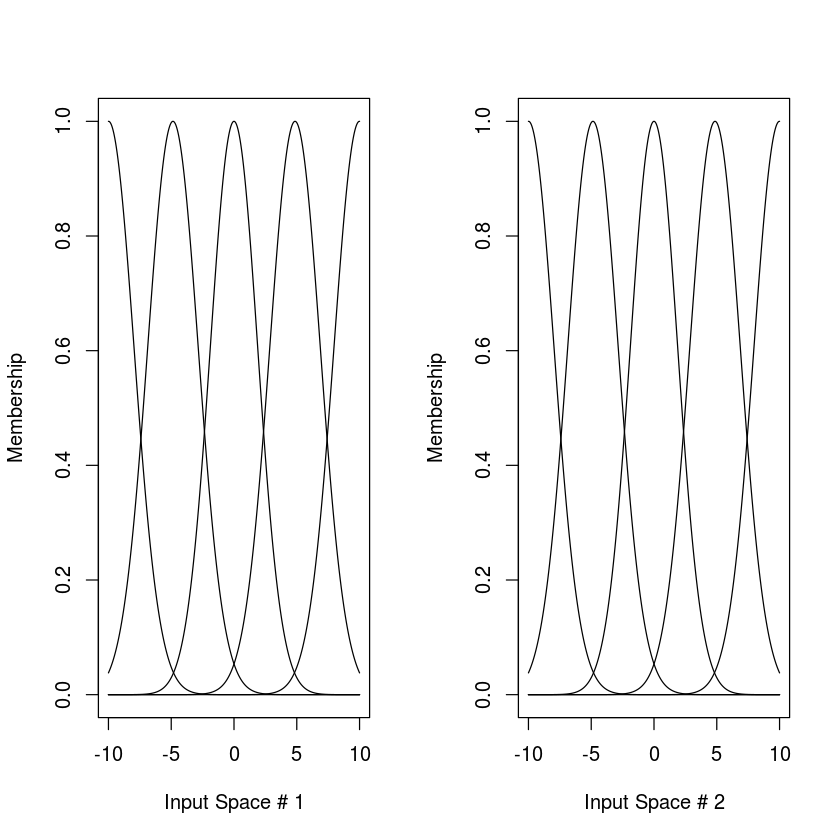

In [22]:
##Test the fit
##MembershipFunctions
# Varredura do espaço de input ( já oferece a visualização dentro da biblioteca)
#
plotMFs(anfis3)

In [23]:
##Just to see if premises, consequents and errors were updated
#este o conjunto final que foi aprendido.....
getPremises(anfis3)[[1]][[1]]

MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
       mu     sigma 
-9.989877  2.024529 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

Realmente a rede aprendeu e ajustou os novos conjuntos fuzzy de acordo com a aprendizagem. Antes tínhamos mu= -10 e sigma = 2

In [29]:
#analisar as possíveis saídas de acordo com as entradas
head(getConsequents(anfis3),15)

z
4.736946e-03
4.736946e-03
8.154616e-02
-1.398768e-02
-9.000427e-03
-1.740969e-01
7.698699e-02
-9.463555e-14
7.126930e-01
-1.398768e-02


In [27]:
#sao todas a possibilidades de saída que são geradas pela rede neural
dim(getConsequents(anfis3))

[1] 75  1

In [24]:

getConsequents(anfis3)[1:2,]

[1] 0.004736946 0.004736946

In [30]:
#erros de cada época
getErrors(anfis3) #Training errors

[1] 0.03741022 0.03238312 0.02992609 0.02866609 0.02759035 0.02661405 0.02569998
[8] 0.02482807 0.02398628

In [31]:

getTrainingType(anfis3)

[1] "trainHybridJangOffLine"

In [32]:
names(coef(anfis3))

[1] "premises"    "consequents"

In [33]:
coef(anfis3)$premises[[input=1]][[mf=1]] #legal isso

MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
       mu     sigma 
-9.989877  2.024529 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

In [34]:
coef(anfis3)$consequents[1:2,]

[1] 0.004736946 0.004736946

In [35]:
##First five train pattern associated values for the training process
fitted(anfis3)[1:5,]

[1] -0.008596328  0.008127665  0.013378351 -0.004183393 -0.030539780

In [36]:
resid(anfis3)[1:5,]

[1]  0.011555918 -0.014855562 -0.010844885  0.014476307  0.005805931

In [37]:
summary(anfis3)

ANFIS network 
Trainning Set: 
	 dim(x)= 121x2 
	 dim(y)= 121x1 
Arquitecture:  2 ( 5x5 ) - 25 - 75 ( 75x1 ) - 1 
Last training error:  0.02398628 

Call: trainHybridJangOffLine(object = anfis3, epochs = 10)

Statistics for Off-line training


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02399 0.02570 0.02759 0.02857 0.02993 0.03741 

In [38]:
##Surface comparison between the original training set and the predicted ANFIS network
yt <- predict(anfis3,X)

In [41]:
head(yt,10)

z
-0.008596328
0.008127665
0.013378351
-0.004183393
-0.030539780
-0.039094482
-0.030539780
-0.004183393
0.013378351
0.008127665


In [45]:
z <- matrix(yt[,1],ncol=length(x),nrow=length(x))

In [46]:
z

-0.008596328,0.008127665,0.01337835,-0.004183393,-0.03053978,-0.03909448,-0.03053978,-0.004183393,0.01337835,0.008127665,-0.008596328
0.008127665,-0.004386843,-0.01855312,-0.004895383,0.06253840,0.09970894,0.06253840,-0.004895383,-0.01855312,-0.004386843,0.008127665
0.013378351,-0.018553117,-0.01057901,0.022107603,-0.01149952,-0.04933028,-0.01149952,0.022107603,-0.01057901,-0.018553117,0.013378351
-0.004183393,-0.004895383,0.02210760,0.022476744,-0.10248094,-0.18395860,-0.10248094,0.022476744,0.02210760,-0.004895383,-0.004183393
-0.030539780,0.062538397,-0.01149952,-0.102480943,0.21368269,0.46289749,0.21368269,-0.102480943,-0.01149952,0.062538397,-0.030539780
-0.039094482,0.099708944,-0.04933028,-0.183958603,0.46289749,0.94795554,0.46289749,-0.183958603,-0.04933028,0.099708944,-0.039094482
-0.030539780,0.062538397,-0.01149952,-0.102480943,0.21368269,0.46289749,0.21368269,-0.102480943,-0.01149952,0.062538397,-0.030539780
-0.004183393,-0.004895383,0.02210760,0.022476744,-0.10248094,-0.18395860,-0.10248094,0.022476744,0.02210760,-0.004895383,-0.004183393
0.013378351,-0.018553117,-0.01057901,0.022107603,-0.01149952,-0.04933028,-0.01149952,0.022107603,-0.01057901,-0.018553117,0.013378351
0.008127665,-0.004386843,-0.01855312,-0.004895383,0.06253840,0.09970894,0.06253840,-0.004895383,-0.01855312,-0.004386843,0.008127665
-0.008596328,0.008127665,0.01337835,-0.004183393,-0.03053978,-0.03909448,-0.03053978,-0.004183393,0.01337835,0.008127665,-0.008596328


In [47]:
par(mfrow=c(1,2))

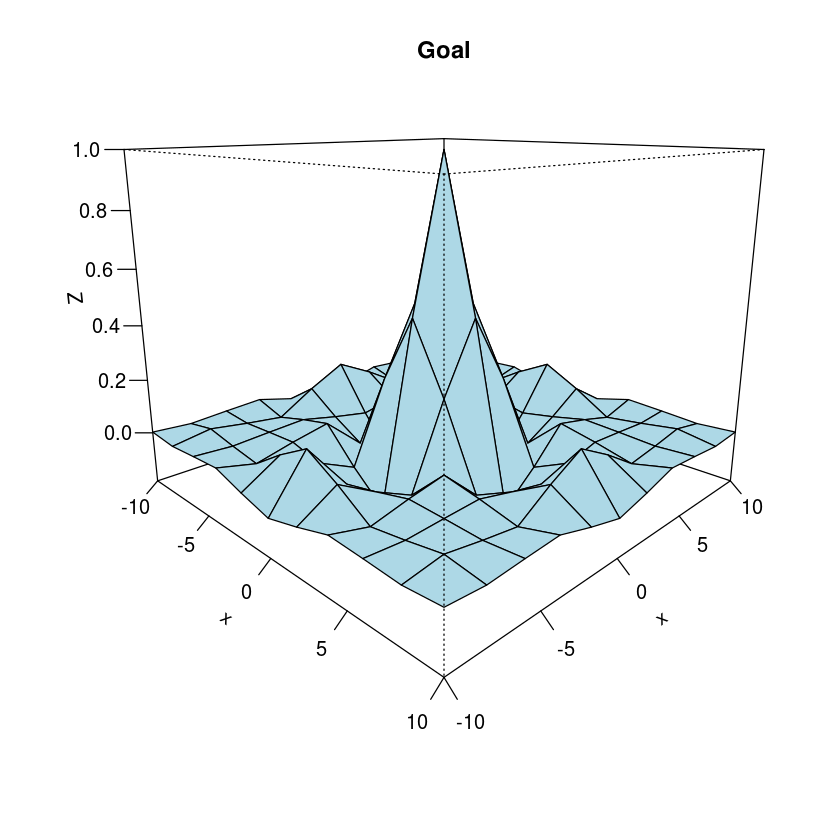

In [48]:
persp(x,x,Z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",
ticktype="detailed",main="Goal")

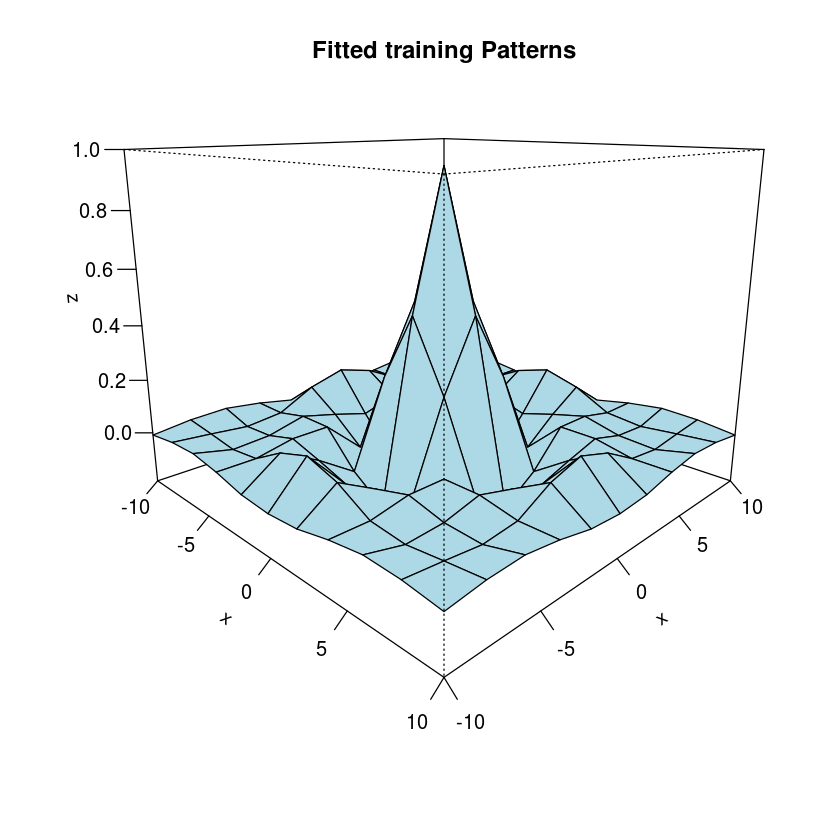

In [49]:
persp(x,x,z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",
ticktype="detailed",main="Fitted training Patterns", zlim=c(min(Z),max(Z)))

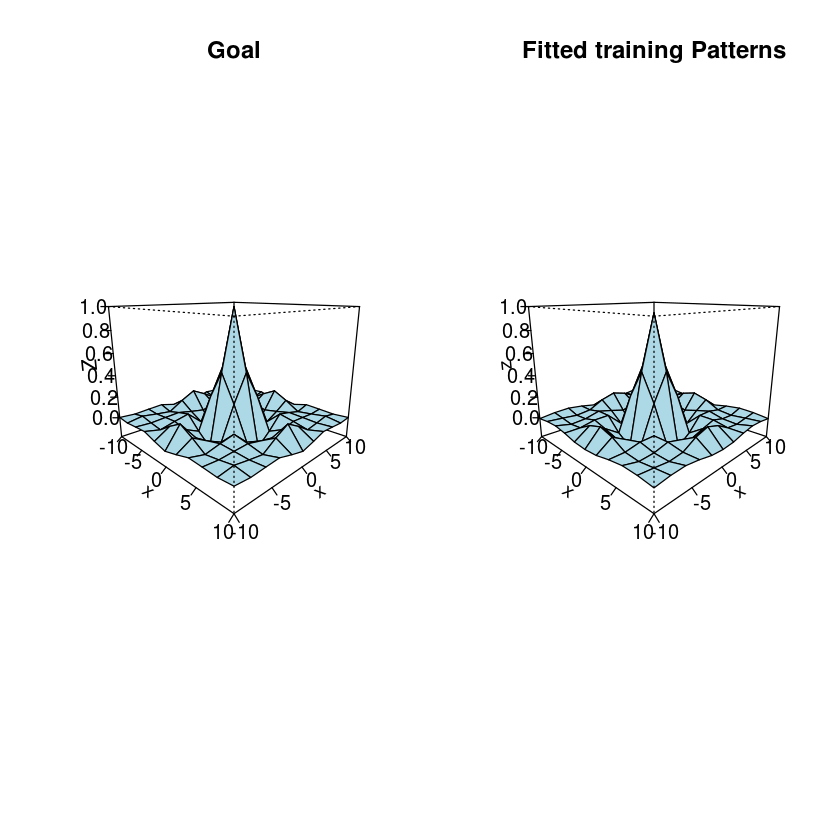

In [51]:
par(mfrow=c(1,2))
persp(x,x,Z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",
ticktype="detailed",main="Goal")
persp(x,x,z,theta = 45, phi = 15, expand = 0.8, col = "lightblue",
ticktype="detailed",main="Fitted training Patterns", zlim=c(min(Z),max(Z)))

## Example 2

In [6]:
#BellMF example I
#A bell membership function with default prototype (a=1, b=1,c=0)
#The membership of x in the bell, should be 1
#The derivate of the first parameter at x, should be 0
#The derivate of the first parameter at x, should be also 0
bell <- new(Class="BellMF")
bell

MembershipFunction:  Bell Membership Function 
Number of parameters: 3 
a b c 
1 1 0 
Expression: expression(1/(1 + (((x - c)/a)^2)^(b^2)))

In [7]:
evaluateMF(object=bell, x=0)

c 
1

In [8]:
derivateMF(object=bell, x=0, i=1)

b 
0

In [9]:
derivateMF(object=bell, x=0, i="a")

b 
0

In [10]:
#
#BellMF example II
#A bell membership function with parameters (a=4,b=1,c=-10)
#The membership of x in the bell, should be 0.137931
#The derivate of the first parameter at x, should be 0.05945303
#The derivate on "a" at x=0, should be 0.05945303
bell2 <- new(Class="BellMF",parameters=c(a=4,b=1,c=-10))
bell2

MembershipFunction:  Bell Membership Function 
Number of parameters: 3 
  a   b   c 
  4   1 -10 
Expression: expression(1/(1 + (((x - c)/a)^2)^(b^2)))

In [13]:
evaluateMF(object=bell2, x=0)

c 
0.137931

In [14]:
derivateMF(object=bell2, x=0, i=1)

b 
0.05945303

In [15]:
derivateMF(object=bell2, x=0, i="a")

b 
0.05945303

** derivateMF(object, x, i)**

* object  - MembershipFunction class heirs
* x -  numeric of the MembershipFunction to be evaluated 
* i - index of the ith parameter to partially derivate

In [16]:
#GaussianMF example I
#A Gaussian membership function with default prototype (mu=0, sigma=1)
#The membership of x in the gaussian, should be 1/sqrt(2*pi) = 0.3989423
#The derivate of the first parameter at x, should be 0
#The derivate on "mu" parameter at x, should be 0
gaussian <- new(Class="GaussianMF")
gaussian

MembershipFunction:  Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    0     1 
Expression: expression(1/sqrt(2 * pi * sigma^2) * exp(-1/2 * ((x - mu)/sigma)^2))

In [17]:
evaluateMF(object=gaussian, x=0)

sigma 
0.3989423

In [18]:
derivateMF(object=gaussian, x=0, i=1)

sigma 
    0

In [19]:
derivateMF(object=gaussian, x=0, i="mu")

sigma 
    0

In [20]:
#
#GaussianMF example II
#A Gaussian membership function with parameters (mu=0, sigma=1)
#The membership of x in the Gaussian, should be 1/sqrt(2*pi) = 0.3989423
#The derivate of the first parameter at x, should be 0
#The derivate on "mu" parameter at x, should be 0
gaussian2 <- new(Class="GaussianMF",parameters=c(mu=0,sigma=1))
gaussian2

MembershipFunction:  Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    0     1 
Expression: expression(1/sqrt(2 * pi * sigma^2) * exp(-1/2 * ((x - mu)/sigma)^2))

In [21]:
evaluateMF(object=gaussian2, x=0)

sigma 
0.3989423

In [22]:
derivateMF(object=gaussian2, x=0, i=1)

sigma 
    0

In [23]:
derivateMF(object=gaussian2, x=0, i="mu")

sigma 
    0

In [24]:
#NormalizedGaussianMF example I
#A normalized Gaussian membership function with default parameters (mu=0, sigma=1)
#The derivate of the first parameter at x, should be 1
#The derivate of the first parameter at x, should be 0
#The derivate on "mu" parameter at x, should be 0
normalizedGaussian <- new(Class="NormalizedGaussianMF")
normalizedGaussian

MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    0     1 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

In [25]:
evaluateMF(object=normalizedGaussian, x=0)

mu 
 1

In [26]:
derivateMF(object=normalizedGaussian, x=0, i=1)

sigma 
    0

In [27]:
derivateMF(object=normalizedGaussian, x=0, i="mu")

sigma 
    0

In [28]:
#
#NormalizedGaussianMF example II
#A normalized Gaussian membership function with parameters (mu=0, sigma=1)
#The derivate of the first parameter at x, should be 1
#The derivate of the first parameter at x, should be 0
#The derivate on "mu" parameter at x, should be 0
normalizedGaussian2 <- new(Class="NormalizedGaussianMF",
 parameters=c(mu=0,sigma=1))
normalizedGaussian2

MembershipFunction:  Normalized Gaussian Membership Function 
Number of parameters: 2 
   mu sigma 
    0     1 
Expression: expression(exp(-1/2 * ((x - mu)/sigma)^2))

In [29]:
evaluateMF(object=normalizedGaussian2, x=0)

mu 
 1

In [30]:
derivateMF(object=normalizedGaussian2, x=0, i=1)

sigma 
    0

In [31]:
derivateMF(object=normalizedGaussian2, x=0, i="mu")

sigma 
    0